# Workshop: Olympic Medals

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1920px-Olympic_rings_without_rims.png" width=300>

First clone the repository at [https://github.com/daniprec/BAM-Coding-Lab](https://github.com/daniprec/BAM-Coding-Lab)

You will find the data inside `data/olympics`.


---

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

---

## 💰 Gross Domestic Product (GDP) per Capita

Now analyze the "gdp.csv" file, which includes data on all GDP per capita by year and country.

Use the techniques we have learnt in the first notebook!

In [8]:
path_gdp = "../data/olympics/gdp.csv"

df_gdp = pd.read_csv(path_gdp)

df_gdp.head(5)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1280.4631
1,Afghanistan,AFG,2003,1292.3335
2,Afghanistan,AFG,2004,1260.0605
3,Afghanistan,AFG,2005,NaN
4,Afghanistan,AFG,2006,1366.9932


In [9]:
# Rename columns
df_gdp = df_gdp.rename(columns={"GDP per capita, PPP (constant 2017 international $)": "GDP"})

# Drop "Entity" column (optional)
df_gdp = df_gdp.drop(columns=["Entity"])

In [10]:
# Fill the missing values of "GDP", applying a linear interpolation by "Code" and "Year"
df_gdp["GDP"] = df_gdp.groupby("Code")["GDP"].transform(lambda x: x.interpolate())

# Check the result
df_gdp.head(5)

,Code,Year,GDP
0,AFG,2002,1280.46310
1,AFG,2003,1292.33350
2,AFG,2004,1260.06050
3,AFG,2005,1313.52685
4,AFG,2006,1366.99320


---

## ➕ Merge Dataframes

We will use the pipeline we created to load and process the "olympics_medals.csv"

In [11]:
from olympics import load_and_preprocess, count_medals

# Use our function to load and preprocess the data
df_medals = load_and_preprocess(path_csv="../data/olympics/olympics_medals.csv")
df_medals = count_medals(df_medals)

print(df_medals.columns)

Index(['year', 'country_noc', 'medals'], dtype='object')


We can now use Pandas to merge both datasets!

In [12]:
# Merge by country code ("country_noc" / "Code") and year ("year" / "Year")
df = pd.merge(df_medals, df_gdp, left_on=["country_noc", "year"], right_on=["Code", "Year"])

df

,year,country_noc,medals,Code,Year,GDP
0,1992,ARG,1,ARG,1992,16190.511
1,1992,AUS,27,AUS,1992,30180.310
2,1992,AUT,23,AUT,1992,38774.492
3,1992,BEL,3,BEL,1992,36426.992
4,1992,BRA,3,BRA,1992,10103.788
...,...,...,...,...,...,...
575,2022,POL,1,POL,2022,37706.605
576,2022,SVK,2,SVK,2022,33176.184
577,2022,SWE,18,SWE,2022,55359.344
578,2022,UKR,1,UKR,2022,10731.440


Lets plot the medals won by country compared to their GDP per capita.

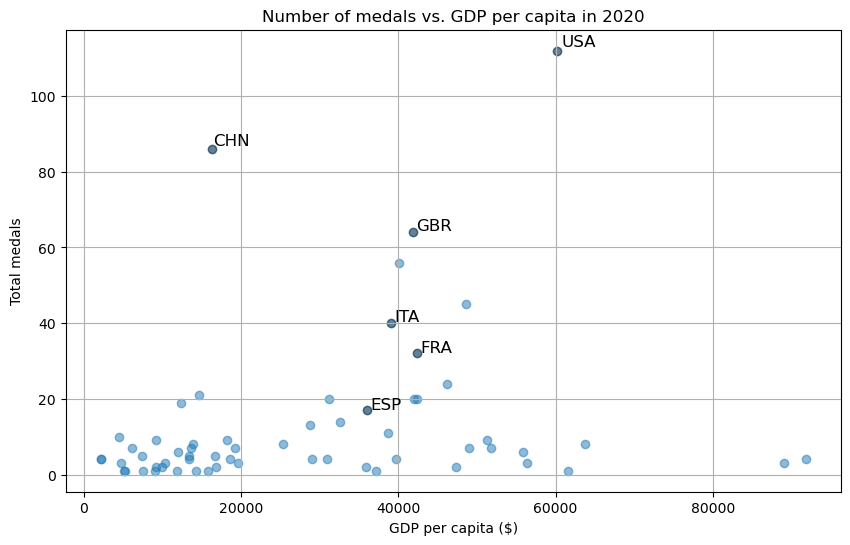

In [42]:
# Plot the GDP per capita vs. the number of medals for 2020
year = 2020
df_yr = df[df["year"] == year]
plt.figure(figsize=(10, 6))
plt.scatter(df_yr["GDP"], df_yr["medals"], alpha=0.5)

# Highlight some countries
countries = ["USA", "CHN", "ESP", "FRA", "GBR", "ITA"]
for country in countries:
    df_country = df_yr[df_yr["country_noc"] == country]
    x = df_country["GDP"].iloc[0]
    y = df_country["medals"].iloc[0]
    plt.scatter(x, y, color="black", alpha=0.3)
    # Add a text above the point
    plt.text(x * 1.01, y * 1.01, country, fontsize=12)

plt.xlabel("GDP per capita ($)")
plt.ylabel("Total medals")
plt.title(f"Number of medals vs. GDP per capita in {year}")
plt.grid(True)
plt.show()

<div style="color: red">
<strong>Challenge:</strong> Why doesn’t our chart match the one from the news article?

Aside from covering different years, the key difference is that we're using GDP per capita, while the article uses total GDP!

To match their approach, we would need to compute total GDP by finding the population of each country for every year.
</div>

---

## 🛠️ Building a Pipeline Script

Now, let's enhance your `olympics.py` script. Add a new function called `add_gdp()` that will:

- Take as input the dataframe processed by `count_medals()` and the path to the "gdp.csv" file.
- Preprocess the GDP data as needed.
- Return a combined dataframe, merging both the medals and GDP data by year and country.